In [116]:
import pandas as pd
import json
from pandas import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#carregando o arquivo do tipo json
with open('dataset.json') as arquivo_json:
    # objeto python recebendo o carregamento de um arquivo json (transformando em obj (dicionário))
    objeto_json = json.load(arquivo_json)
objeto_json

{'examples': [{'id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
   'content': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
   'metadata': {},
   'annotatio

In [264]:
df = json_normalize(objeto_json['examples'])
df['content']

0     While bismuth compounds (Pepto-Bismol) decreas...
1     Diarrhea, also spelled diarrhoea, is the condi...
2     Antiretroviral therapy (ART) is recommended fo...
3     The following drugs are considered as DMARDs: ...
4     The goals of treatment are to reduce pain, dec...
5     Hantaviruses, usually found in rodents and shr...
6     Bats are the most common source of rabies in h...
7     In 2003, following the outbreak of severe acut...
8     Bacterial vaginosis is caused by bacteria that...
9     Other groups of intracellular bacterial pathog...
10    One of the bacterial diseases with the highest...
11    Although the vast majority of bacteria are har...
12    Much like viral pathogens, infection by certai...
13    The term pathogen came into use in the 1880s.[...
14    Some antidepressants are used as a treatment f...
15    However, existing data suggest that patients t...
16    Latent TB is treated with either isoniazid or ...
17    If a tuberculosis infection does become ac

## Quais são os textos contidos no dataset (i.e., campo 'content')

In [36]:
#Encontrando o tamnho do arquivo, para dinamizar caso seja adicionado mais chaves. 
tamanho = len(objeto_json['examples'])
#passando por cada elemento do dicionário e printando o valor da chave 'content'
content = []
for i in range(0,tamanho):
    content.append(objeto_json['examples'][i]['content'])
    
content

["While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]",
 'Diarrhea, also spelled diarrhoea, is the condition of having at least three loose, liquid, or watery bow

## Qual a quantidade de textos/documentos no dataset ?

In [15]:
elementos = len(objeto_json['examples'])
#São 31 elementos/documentos/colletion. Como python indexa pelo [0], temos até o range [30]
elementos


31

##  Qual a quantidade total de anotações no dataset (i.e., itens dentro de annotations) 

In [18]:
qnt = 0
anotacao =[]
for i in range(0,tamanho):
    anotacao.append(objeto_json['examples'][i]['annotations'])
    qnt = qnt + len(anotacao[i])
# A quantidade total de anotações é de : 295.
qnt

295

In [19]:
anotacao_qnt_item = []
for h in range(0,31):
    anotacao_qnt_item.append(len(anotacao[h]))
print(anotacao_qnt_item)


[18, 8, 7, 38, 4, 4, 8, 8, 33, 9, 16, 16, 5, 5, 22, 3, 6, 5, 0, 2, 4, 7, 8, 7, 3, 6, 7, 9, 4, 7, 16]


## Qual a frequência de cada tag no dataset (i.e., campo tag_name) ?

In [191]:
# Como dentro de cada annotations exite uma tag_name, sendo assim foram extraidos 295 dados.
tag_name=[]
for i in range(0,tamanho):
    for j in range(0,anotacao_qnt_item[i]):
        tag_name.append(anotacao[i][j]['tag_name'])
print(tag_name)
len(tag_name)

['Medicine', 'Medicine', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'Pathogen', 'Pathogen', 'Medicine', 'Pathogen', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'MedicalCondition', 'MedicalCondition', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'Medicine', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'MedicalCondition', 'Medicine', 'Medicine', 'Medicine', 'Medicine', 'Medici

295

#### Fazendo uma analise de frequencia 

In [168]:
#Utilizando a função set(), para buscar apenas os valores diferentes.
tag_name_tipos = set(tag_name)


#Realizando a contagem de cada palavra igual.
medicine = tag_name.count('Medicine')
medicalCondition = tag_name.count('MedicalCondition')
pathogen = tag_name.count('Pathogen')


#Criando gráfico :
atividades = list(tag_name_tipos)
fatias  = [medicine, medicalCondition, pathogen]
colunas = ['c','m','r']

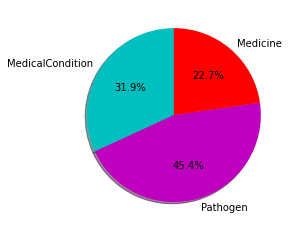

In [166]:
#Exibindo o gráfico:
plt.pie(fatias, labels = atividades, colors = colunas,  startangle = 90, shadow = True, explode = None, autopct = '%2.1f%%')
plt.show()

## Quais as 30 palavras mais anotadas no dataset (i.e., campo value) ?

In [190]:
#Extraindo os dados da TAG campo value
tag_value=[]
for i in range(0,tamanho):
    for j in range(0,anotacao_qnt_item[i]):
        tag_value.append(anotacao[i][j]['value'])
tag_value

#Buscando os primeiro 30 valores que possuem mais repetição
top_30=pd.Series.value_counts(tag_value).head(30)
top_30

diarrhea              6
HIV                   5
methotrexate          5
hydroxychloroquine    3
Wellbutrin            3
influenza             3
ART                   3
Salmonella            3
rabies                3
bacteria              2
amantadine            2
chickenpox            2
tocilizumab           2
vomiting              2
Zyban                 2
sulfasalazine         2
Cellulitis            2
Pseudomonas           2
inflammation          2
bacteria              2
bedaquiline           2
Yersinia pestis       2
Streptococcus         2
tetanus               2
typhoid fever         2
Campylobacter         2
diphtheria            2
syphilis              2
Shigella              2
fluvoxamine           2
dtype: int64

In [183]:
# Criando Gráfico:
x30 =top_30.values
y30 = top_30.keys()
print(x30)
print(y30)

[6 5 5 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Index(['diarrhea', 'HIV', 'methotrexate', 'hydroxychloroquine', 'Wellbutrin',
       'influenza', 'ART', 'Salmonella', 'rabies', 'bacteria ', 'amantadine',
       'chickenpox', 'tocilizumab', 'vomiting', 'Zyban', 'sulfasalazine',
       'Cellulitis', 'Pseudomonas', 'inflammation', 'bacteria', 'bedaquiline',
       'Yersinia pestis', 'Streptococcus', 'tetanus', 'typhoid fever',
       'Campylobacter', 'diphtheria', 'syphilis', 'Shigella', 'fluvoxamine'],
      dtype='object')


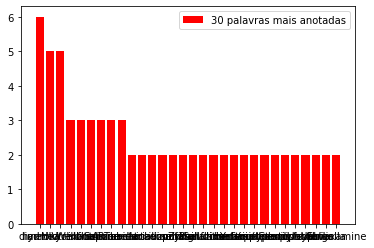

In [188]:
#Exibindo o Gráfico:
plt.bar(y30, x30, label = '30 palavras mais anotadas', color = 'r')
plt.legend()
plt.show()

In [56]:
len(pd.Series.value_counts(tag_value))

242

## O tamanho do vocabulário de anotação (palavras únicas anotadas)


In [194]:
#Foramencontradas 242 palavras unicas (que não se repetem).
palavras_unicas=pd.Series(pd.Categorical(list(tag_value))).unique
palavras_unicas

<bound method Series.unique of 0                    Diosmectite
1      aluminomagnesium silicate
2                       diarrhea
3                     kaopectate
4              bismuth compounds
                 ...            
290                  stomach flu
291                    diarrhea 
292                feeling tired
293                     diarrhea
294              influenza virus
Length: 295, dtype: category
Categories (242, object): [' ', ' Wellbutrin', ' social anxiety disorder', ' tetanus,', ..., 'watery bowel movements', 'yeast infection', 'yphoid fever', 'zanamivir']>